# Word Cloud

There are certain words that spammers' use very commonly in their email's to catch the attention of their targets. We try to find such words from the email body by constructing a word cloud from our spam dataset. Bigger words in the word cloud are one's that occur more frequently in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import re
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

Importing the excel file we created in part 1 into a pandas dataframe. We use a converter to convert all empty cell values to np.NaN and non-empty cell values to string type.

In [2]:
# converter
def conv(content):
    # check for NaN 
    if(content != content):
        return np.NaN
    # else convert to string
    return str(content)
    

In [3]:
converters = {'Spam':conv, 'Body':conv, 'Subject':conv, 'From':conv, 'To':conv, 'X-UIDL':conv, 'Message-Id':conv, 'Sender':conv}

In [4]:
mails = pd.read_excel('df_final.xlsx', sheet_name='Sheet1', index_col=None, converters=converters, nrows=400 )

In [5]:
mails.head()

,From,To,Message-Id,Subject,Body,Spam,X-UIDL,Sender
0,aj881c <aj881c@ix.netcom.com>\n,<bagpipes@acadia.net>\n,<19943672.886214@relay.comanche.denmark.eu> M...,2-1\n,email marketing works!!\n\nbull's eye gold is ...,Spam,NaN,NaN
1,iwbp@mailcity.com\n,members@your.net\n,<>\n,"Exclusive Internet Business, 1st Time Offered...",>>>this is the most exciting breakthrough ever...,Spam,NaN,NaN
2,am74rt <am74rt@worldnet.att.net>\n,<badams@eastky.com>\n,<19943672.886214@relay.comanche.denmark.eu> T...,2-17\n,email marketing works!!\n\nbull's eye gold is ...,Spam,NaN,NaN
3,"""D.Reynolds"" <subwiz1@friendlyserver.com>\n",NaN,<199802161222.EAA24869@net1.aoci.com>\n,ADV: FREE DOWNLOAD:Register your web site to ...,free download.register your web site to over 7...,Spam,NaN,NaN
4,carlover@goplay.com\n,carlovers@america.com\n,<>\n,AUTOMOBILE OPPORTUNITY\n,do you love cars?\n\nwant your own business?\n...,Spam,NaN,NaN


    We use the nltk package to: 
    1. remove all punctuation using regex & convert to lower case
    2. Tokenize, stem (Porter stemmer) & remove stop words

In [6]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [7]:
def transformBody(body):
    # removing ' character (eg. dollar's -> dollars)
    # remove other puctuation
    body = str(body).replace("'", "")
    body = re.sub(r"[^\w\s]|_", "", body)
    #body = re.sub("[\s+]", " ", body)

    # to lower case
    bodylower = body.lower()
    
    # tokenize, stem and remove stop words
    bodylist = word_tokenize(bodylower)
    stemmer = PorterStemmer()
    stemmedlist = [stemmer.stem(word) for word in bodylist]
    sw = stopwords.words('english')
    finalist = [word for word in bodylist if(word not in sw)]
    return finalist

In [8]:
spamBodies = mails[mails['Spam'] == 'Spam']['Body']

In [9]:
spamBodies2 = spamBodies.map(transformBody)

In [10]:
spam_words = ' '.join(np.concatenate(spamBodies2.values.tolist()).tolist())

    Using wordcloud package to generate the wordcloud

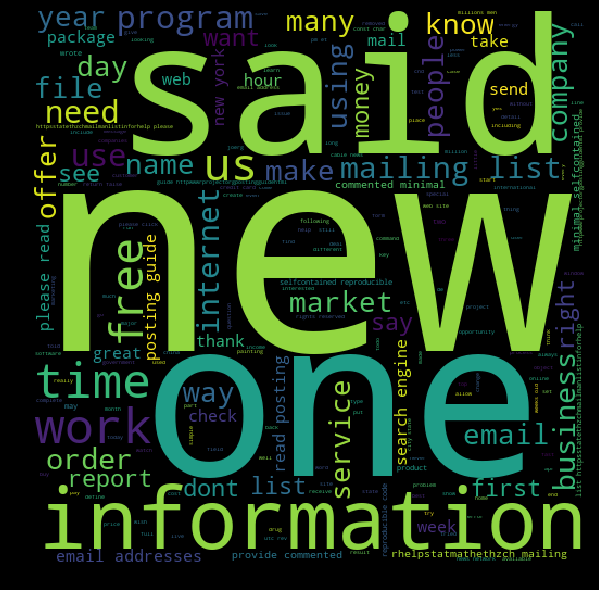

In [11]:
spam_wc = wordcloud.WordCloud(width=512, height=512).generate(spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [12]:
#spamBodies['whereHTML'] = spamBodies['Body'].apply(lambda x: x[x.find('tm3')-30:] if(str(x).find('tm3') != -1) else np.NaN)

In [13]:
#spamBodies[spamBodies['whereHTML'].notna()]['whereHTML']

In [14]:
#print(spamBodies.ix[41]['Body'])

In [17]:
print(mails.iloc[41]['Body'])

/9j/4aaqskzjrgabaqeayabgaad/2wbdaaggbgcgbqghbwcjcqgkdbqndasldbksew8uhrofhh0a
hbwgjc4nicisixwckdcpldaxndq0hyc5ptgypc4zndl/2wbdaqkjcqwldbgndrgyirwhmjiymjiy
mjiymjiymjiymjiymjiymjiymjiymjiymjiymjiymjiymjiymjiymjiymjl/waarcad2absdasia
ahebaxeb/8qahwaaaqubaqebaqeaaaaaaaaaaaecawqfbgcicqol/8qatraaagedawieawufbaqa
aaf9aqidaaqrbrihmuege1fhbyjxfdkbkaeii0kxwrvs0fakm2jyggkkfhcygroljicokso0nty3
odk6q0rfrkdisuptvfvwv1hzwmnkzwznaglqc3r1dnd4exqdhiwgh4ijipktljwwl5izmqkjpkwm
p6ipqrkztlw2t7i5usldxmxgx8jjytlt1nxw19jz2uhi4+tl5ufo6erx8vp09fb3+pn6/8qahwea
awebaqebaqebaqaaaaaaaaecawqfbgcicqol/8qatreaagecbaqdbacfbaqaaqj3aaecaxeebsex
bhjbuqdhcrmimoeifekrobhbcsmzuvavynlrchyknoel8rcygromjygpkju2nzg5okneruzhselk
u1rvvldywvpjzgvmz2hpann0dxz3ehl6gooehyahiimkkpoulzaxmjmaoqokpaanqkmqsro0tba3
ulm6wspexcbhymnk0tpu1dbx2nna4upk5ebn6onq8vp09fb3+pn6/9oadambaairaxeapwd3atio
xli6hfi7zgk8fhirx9l8xlyahqlywrxqjkdko3itjpa9dmtqncvw/k9jnr4ing3mtz1l52hazvzq
izyz/wby351wpxa8sx2lxvna6fcmf2rpjsacsccdqpzqzl6txplsxm8twwk0tssjxztng2wjiofx

In [18]:
mails = pd.read_excel('df_final.xlsx', sheet_name='Sheet1', index_col=None, converters=converters )
df_final = mails

In [19]:
# Feature1 -> From same as To. If yes -> 1, else 0
df_final['Feature1'] = 0
df_final.loc[df_final['From'] == df_final['To'], 'Feature1'] = 1
df_final['Feature1'].describe()

count    2039.000000
mean        0.003923
std         0.062530
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Feature1, dtype: float64

In [20]:
import re
def isValidEmailFormat(emails):
    for email in str(emails).split(','):
        if(email.isspace() or len(email) == 0):
            continue
            
        email = re.sub(r'(\n+)', r' ', str(email)).strip()
        print(email)
        
        if(re.match(r"(.+)<(.+)>|<(.+)>", email)):
            email = email[email.find("<")+1:-1]
            print(0, email)
            
        if(len(email) > 7):
            if(re.match("^.+@([?)[a-zA-Z0-9-.]+.([a-zA-Z]{2,3}|[0-9]{1,3})(]?))$", email) != None):
                print('continue')
                continue
            else:
                print('1')
                return 1
        else:
            return 1
        
    return 0

In [21]:
# Feature2 -> is the To column na or invalid ? 1->invalid, 0->valid
df_final['Feature2'] = 0
df_final['Feature2'] = df_final['To'].map(isValidEmailFormat)
df_final.loc[df_final['To'].isna(),'Feature2'] = 1
df_final[df_final['Feature2'] == 1][['Feature2','To']]

<bagpipes@acadia.net>
0 bagpipes@acadia.net
continue
members@your.net
continue
<badams@eastky.com>
0 badams@eastky.com
continue
nan
carlovers@america.com
continue
bait@mikhail.qcc.sk.ca
continue
<badmin@forum-de-beyrouth.com.lb>
0 badmin@forum-de-beyrouth.com.lb
continue
UDog244@aol.com
continue
baileyl@cream.cambridge.scr.slb.com
continue
baileyl@delphi.com
continue
baileyl@erols.com
continue
user@aol.com
continue
bguenter@gemprint.com
continue
buratuss_ef@bigfoot.com
continue
guluimai67@msn.com
continue
<vworlds@vworlds.com>
0 vworlds@vworlds.com
continue
p40508@presence4u.com
continue
bruceg@qcc.sk.ca
continue
usr999@aol.com
continue
BeSeen@At.Our.Site.com
continue
bguenter@gemprint.com       Is your site listed with the top search engines?  ListMe will       list you with 50 search engines and indexes for $90.       Satisfaction guaranteed!  Search engines are the only way most people have to find internet sites. But if your site is not listed
1
bruce.guenter@gemprint.com       Is 

0 r-help@stat.math.ethz.ch> Sent: Monda
1
the00@plg.uwaterloo.ca
continue
mail@speedy.uwaterloo.ca
continue
<manager@speedy.uwaterloo.ca>
0 manager@speedy.uwaterloo.ca
continue
r-help@stat.math.ethz.ch
continue
mail@speedy.uwaterloo.ca
continue
theorize@plg.uwaterloo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
<mack@speedy.uwaterloo.ca>
0 mack@speedy.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
elyakhlifi mustapha <elyakhlifi_mustapha@yahoo.fr>
0 elyakhlifi_mustapha@yahoo.fr
continue
r-help@stat.math.ethz.ch
continue
Allison Randal via RT <parrotbug-followup@parrotcode.org> cc: chip@pobox.com
0 parrotbug-followup@parrotcode.org> cc: chip@pobox.co
continue
Charlie <tsang0323@hotmail.com> References: <BAY144-DAV179DE7A30A3A0B06034BAA2520@phx.gbl>
0 tsang0323@hotmail.com> References: <BAY144-DAV179DE7A30A3A0B06034BAA2520@phx.gbl
continue
gnitpick@speedy.uwaterloo.ca
continue
<mail@speedy.uwaterloo.ca>
0 mail@speedy.uwaterloo.ca
continue
Dafydd Har

"ktwarwic" <ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
r-help@stat.math.ethz.ch
continue
"Molly Ray" <theorize@plg.uwaterloo.ca>
0 theorize@plg.uwaterloo.ca
continue
"Delmar" <catchall@speedy.uwaterloo.ca>
0 catchall@speedy.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
<smiles@speedy.uwaterloo.ca>
0 smiles@speedy.uwaterloo.ca
continue
<the00@plg2.math.uwaterloo.ca>
0 the00@plg2.math.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
"Subscriber" <producttestpanel@speedy.uwaterloo.ca>
0 producttestpanel@speedy.uwaterloo.ca
continue
"Wiley" <gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
"catchall" <catchall@speedy.uwaterloo.ca>
0 catchall@speedy.uwaterloo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
ktwarwic@SPEEDY.UWATERLOO.CA
continue
<1@speedy.uwaterloo.ca>
0 1@speedy.uwaterloo.ca
continue
<theorize@plg.uwaterloo.ca>
0 theorize@

0 r.arecibo@gmail.com
continue
R-help <r-help@stat.math.ethz.ch>
0 r-help@stat.math.ethz.ch
continue
<gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
<catchall@speedy.uwaterloo.ca>
0 catchall@speedy.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
<elaastic@speedy.uwaterloo.ca>
0 elaastic@speedy.uwaterloo.ca
continue
"r-help@lists.r-project.org" <r-help@stat.math.ethz.ch>
0 r-help@stat.math.ethz.ch
continue
the00@speedy.uwaterloo.ca
continue
samba-cvs@samba.org
continue
mj@ut.ee
continue
"catchall" <catchall@speedy.uwaterloo.ca>
0 catchall@speedy.uwaterloo.ca
continue
the00@plg.uwaterloo.ca
continue
<catchall@speedy.uwaterloo.ca>
0 catchall@speedy.uwaterloo.ca
continue
<warwic@grangemore.ie>
0 warwic@grangemore.ie
continue
<warwicginty@yahoo.co.uk>
0 warwicginty@yahoo.co.uk
continue
<warwick@speedy.uwaterloo.ca>
0 warwick@speedy.uwaterloo.ca
continue
nan
<theorize@speedy.uwaterloo.ca>
0 theorize

continue
"theorize" <theorize@plg.uwaterloo.ca>
0 theorize@plg.uwaterloo.ca
continue
Patrick Connolly <p_connolly@ihug.co.nz> References: <20070416202237.GF6142@ihug.co.nz>
0 p_connolly@ihug.co.nz> References: <20070416202237.GF6142@ihug.co.nz
continue
undisclosed-recipients:;
1
"gnitpick" <gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
<catchall@speedy.uwaterloo.ca>
0 catchall@speedy.uwaterloo.ca
continue
"the00" <the00@plg2.math.uwaterloo.ca>
0 the00@plg2.math.uwaterloo.ca
continue
"the00" <the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
"the00" <the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
"the00" <the00@plg2.math.uwaterloo.ca>
0 the00@plg2.math.uwaterloo.ca
continue
producttestpanel@speedy.uwaterloo.ca
continue
the00@plg2.math.uwaterloo.ca
continue
"gnitpick" <gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
"ktwarwic" <ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
"the00" <the00@plg.uwaterlo

"Andrew Coopers" <avcooper@speedy.uwaterloo.ca>
0 avcooper@speedy.uwaterloo.ca
continue
"Andrew Coopers" <avcooper@speedy.uwaterloo.ca>
0 avcooper@speedy.uwaterloo.ca
continue
samba-cvs@samba.org
continue
<smiles@speedy.uwaterloo.ca>
0 smiles@speedy.uwaterloo.ca
continue
manager@speedy.uwaterloo.ca
continue
"ktwarwic" <ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
"gnitpick" <gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
"Andrew Coopers" <avcooper@speedy.uwaterloo.ca>
0 avcooper@speedy.uwaterloo.ca
continue
<gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
<soundtrackdeficient@speedy.uwaterloo.ca>
0 soundtrackdeficient@speedy.uwaterloo.ca
continue
"Corey Roberts" <the00@plg2.math.uwaterloo.ca>
0 the00@plg2.math.uwaterloo.ca
continue
<theorize@plg.uwaterloo.ca>
0 theorize@plg.uwaterloo.ca
continue
samba-cvs@samba.org
continue
"Ramiro" <ramiro@speedy.uwaterloo.ca>
0 ramiro@speedy.uwaterloo.ca
continue
samba-cvs@samba.or

<mhln@mhln.com>
0 mhln@mhln.com
continue
<gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
samba-cvs@samba.org
continue
cruiseca@speedy.uwaterloo.ca
continue
<ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
gnitpick@speedy.uwaterloo.ca
continue
<ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
<elaastic@speedy.uwaterloo.ca>
0 elaastic@speedy.uwaterloo.ca
continue
"the00" <the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
"Leonor" <theorize@plg.uwaterloo.ca>
0 theorize@plg.uwaterloo.ca
continue
gnitpick@speedy.uwaterloo.ca
continue
samba-technical@lists.samba.org
continue
ktwarwic@speedy.uwaterloo.ca
continue
<elaastic@speedy.uwaterloo.ca>
0 elaastic@speedy.uwaterloo.ca
continue
samba-cvs@samba.org
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
<catchall@speedy.uwaterloo.ca>
0 catchall@speedy.uwaterloo.ca
continue
<faisalabad@speedy.uwaterloo.ca>
0 faisalabad@speedy.uwaterloo.ca
continue
"ktwarw

0 gnitpick@speedy.uwaterloo.ca
continue
debian-legal@lists.debian.org
continue
<vcoopers@speedy.uwaterloo.ca>
0 vcoopers@speedy.uwaterloo.ca
continue
samba-cvs@samba.org
continue
samba-cvs@samba.org
continue
Jorge Cornejo-Donoso <jorgecornejo@uach.cl> References: <200704162009.l3GK9T7I024232@hypatia.math.ethz.ch>
0 jorgecornejo@uach.cl> References: <200704162009.l3GK9T7I024232@hypatia.math.ethz.ch
continue
the00@plg.uwaterloo.ca
continue
gjditchf@plg.uwaterloo.ca
continue
r-help@stat.math.ethz.ch
continue
"Janella" <dmason@plg2.math.uwaterloo.ca>
0 dmason@plg2.math.uwaterloo.ca
continue
"Christel Wilson" <theorize@plg.uwaterloo.ca>
0 theorize@plg.uwaterloo.ca
continue
bugs-bitbucket@netlabs.develooper.com
continue
<gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
<gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
perl6-internals@perl.org
continue
parrot-porters@perl.org
continue
ktwarwic

0 ktwarwic@speedy.uwaterloo.ca
continue
"Ramiro" <ramiro@speedy.uwaterloo.ca>
0 ramiro@speedy.uwaterloo.ca
continue
<mhln@mhln.com>
0 mhln@mhln.com
continue
"gnitpick" <gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
henna@plg.uwaterloo.ca
continue
r-help@stat.math.ethz.ch
continue
undisclosed-recipients:;
1
"gnitpick" <gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
the00@plg.uwaterloo.ca
continue
the00@plg2.math.uwaterloo.ca
continue
<catchall@speedy.uwaterloo.ca>
0 catchall@speedy.uwaterloo.ca
continue
the00@plg.uwaterloo.ca
continue
gjditchf@plg.uwaterloo.ca
continue
Robin Hankin <r.hankin@noc.soton.ac.uk>
0 r.hankin@noc.soton.ac.uk
continue
Prof Brian Ripley <ripley@stats.ox.ac.uk>
0 ripley@stats.ox.ac.uk
continue
<manager@speedy.uwaterloo.ca>
0 manager@speedy.uwaterloo.ca
continue
<mail@speedy.uwaterloo.ca>
0 mail@speedy.uwaterloo.ca
continue
<manager@speedy.uwaterloo.ca>
0 manager@speedy.uwaterloo.ca
continue
<wheat@speedy.uwaterloo.ca

continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
"alma" <y5guo@plg2.math.uwaterloo.ca>
0 y5guo@plg2.math.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
<mail@speedy.uwaterloo.ca>
0 mail@speedy.uwaterloo.ca
continue
sugar@laptop.org
continue
<gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
ftp@plg.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
<manager@speedy.uwaterloo.ca>
0 manager@speedy.uwaterloo.ca
continue
BREAKINGNEWS Subscribers<BREAKINGNEWS-Subscribers@foxnews.com>
0 BREAKINGNEWS-Subscribers@foxnews.com
continue
BREAKINGNEWS Subscribers<BREAKINGNEWS-Subscribers@foxnews.com>
0 BREAKINGNEWS-Subscribers@foxnews.com
continue
<gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
<ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
<producttestpanel@speedy.uwaterloo.ca> Precedence: normal
0 producttestpanel@speedy.uwaterloo.ca

0 theorize@plg.uwaterloo.ca
continue
producttestpanel@speedy.uwaterloo.ca
continue
1@bellsouth.net
continue
gnitpick@speedy.uwaterloo.ca
continue
<ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
gnitpick@speedy.uwaterloo.ca
continue
the00@plg2.math.uwaterloo.ca
continue
<smiles@speedy.uwaterloo.ca>
0 smiles@speedy.uwaterloo.ca
continue
deficient@speedy.uwaterloo.ca
continue
<elaastic@speedy.uwaterloo.ca>
0 elaastic@speedy.uwaterloo.ca
continue
producttestpanel@speedy.uwaterloo.ca
continue
"theorize" <theorize@plg.uwaterloo.ca>
0 theorize@plg.uwaterloo.ca
continue
<ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
<ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
cruiseca@speedy.uwaterloo.ca
continue
producttestpanel@speedy.uwaterloo.ca
continue
deficient@speedy.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
<ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
conti

<ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
gnitpick@speedy.uwaterloo.ca
continue
"the00" <the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
<1@speedy.uwaterloo.ca>
0 1@speedy.uwaterloo.ca
continue
"the00" <the00@plg2.math.uwaterloo.ca>
0 the00@plg2.math.uwaterloo.ca
continue
ramiro@speedy.uwaterloo.ca
continue
"Anita" <the00@plg2.math.uwaterloo.ca>
0 the00@plg2.math.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
"ktwarwic" <ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
<theorize@plg.uwaterloo.ca>
0 theorize@plg.uwaterloo.ca
continue
samba-technical@lists.samba.org
continue
smiles@speedy.uwaterloo.ca
continue
samba-technical@lists.samba.org
continue
<r-help@stat.math.ethz.ch>
0 r-help@stat.math.ethz.ch
continue
<r-help-request@stat.math.ethz.ch>
0 r-help-request@stat.math.ethz.ch
continue
sugar@laptop.org
continue
"Subscriber" <producttestpanel@speedy.uwaterloo.ca>
0 producttestpanel@speedy.uwaterloo.ca
continue
sa

"Andrew Coopers" <avcoopers@speedy.uwaterloo.ca>
0 avcoopers@speedy.uwaterloo.ca
continue
<the00@plg2.math.uwaterloo.ca>
0 the00@plg2.math.uwaterloo.ca
continue
"theorize" <theorize@plg.uwaterloo.ca>
0 theorize@plg.uwaterloo.ca
continue
"the00" <the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
ktwarwic@SPEEDY.UWATERLOO.CA
continue
<theorize@plg.uwaterloo.ca>
0 theorize@plg.uwaterloo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
nan
<catchall@speedy.uwaterloo.ca>
0 catchall@speedy.uwaterloo.ca
continue
<smiles@speedy.uwaterloo.ca>
0 smiles@speedy.uwaterloo.ca
continue
<catchall@speedy.uwaterloo.ca>
0 catchall@speedy.uwaterloo.ca
continue
<smilen@speedy.uwaterloo.ca>
0 smilen@speedy.uwaterloo.ca
continue
Theorize <theorize@plg.uwaterloo.ca>
0 theorize@plg.uwaterloo.ca
continue
<smilesn@speedy.uwaterloo.ca>
0 smilesn@speedy.uwaterloo.ca
continue
<smilesnn@speedy.uwaterloo.ca>
0 smilesnn@speedy.uwaterloo.ca
continue
<smilenn@speedy.uwaterloo.ca>
0 smilenn@

,Feature2,To
3,1,NaN
18,1,bguenter@gemprint.com \n\n Is your site l...
19,1,bruce.guenter@gemprint.com \n\n Is your s...
20,1,bguenter@linus.vsource.com \n\n Is your s...
108,1,"Kuhn, Max\n"
159,1,NaN
203,1,NaN
224,1,<producttestpanel@speedy.uwaterloo.ca>\nPrece...
234,1,<producttestpanel@speedy.uwaterloo.ca>\nPrece...
242,1,NaN


In [22]:
import re
def isValidMessageID(mid):
    for email in str(mid).split('\n'):
        if(email.isspace() or len(email) == 0 or email.find('@') < 0):
            continue
            
        email = email.strip()
        print(email)
        
        if(re.match(r"(.+)?<<(.+)@(.+)>>(.+)?", email)):
            email = email[email.find("<<")+1:email.rfind(">>")]
            print(0, email)
        
        if(re.match(r"(.+)?<(.+)@(.+)>(.+)?", email)):
            email = email[email.find("<")+1:email.rfind(">")]
            print(0, email)
            
        if(len(email) > 7):
            if(re.match("^.+@([?)[a-zA-Z0-9-.]+.([a-zA-Z]{2,3}|[0-9]{1,3})(]?))$", email) != None):
                return 0
            else:
                continue
        else:
            continue
        
    return 1

In [23]:
# Feature3 -> is the Message-Id column na or invalid ? 1->invalid, 0->valid
df_final['Feature3'] = 0
df_final['Feature3'] = df_final['Message-Id'].map(isValidMessageID)
df_final.loc[df_final['Message-Id'].isna(),'Feature3'] = 1
df_final.loc[df_final['Feature3'] == 1][['Feature3','Message-Id']]

<19943672.886214@relay.comanche.denmark.eu> Monday, February 2nd, 1998
0 19943672.886214@relay.comanche.denmark.eu
<19943672.886214@relay.comanche.denmark.eu> Tuesday, February 17th, 1998
0 19943672.886214@relay.comanche.denmark.eu
<199802161222.EAA24869@net1.aoci.com>
0 199802161222.EAA24869@net1.aoci.com
<19943672.886214@relay.comanche.denmark.eu> Friday, March 6th, 1998
0 19943672.886214@relay.comanche.denmark.eu
<367a6bc2.35086056@aol.com>
0 367a6bc2.35086056@aol.com
<a4193ab9.35086277@aol.com>
0 a4193ab9.35086277@aol.com
<<34B589AA.83376E4D@hotmail.com>>
0 <34B589AA.83376E4D@hotmail.com
<199803140024.GAA02943@1arbiscad.com>
0 199803140024.GAA02943@1arbiscad.com
<199803251503EAA37015@post.ideasign.com>
0 199803251503EAA37015@post.ideasign.com
<0EQG00DSE4M7MP@PM04SM.PMM.MCI.NET>
0 0EQG00DSE4M7MP@PM04SM.PMM.MCI.NET
<199803270303.WAA02236@ns.owlseye.com>
0 199803270303.WAA02236@ns.owlseye.com
<199803270121.TAA11252@linus.vsource.com>
0 199803270121.TAA11252@linus.vsource.com
<19980327

<001201c7802c$7383c3c0$efe9a04c@mike>
0 001201c7802c$7383c3c0$efe9a04c@mike
<20070409185626.D6187162AC3@lists.samba.org>
0 20070409185626.D6187162AC3@lists.samba.org
<1176729801.5216@worldnet.att.net>
0 1176729801.5216@worldnet.att.net
<20070416083745.C56163A3B3E82@noteswireless.net>
0 20070416083745.C56163A3B3E82@noteswireless.net
<12d001c78024$a0bbde52$fa84069f@email.vg>
0 12d001c78024$a0bbde52$fa84069f@email.vg
<20070416083840.3D4E497D9C0F@matchedour.net>
0 20070416083840.3D4E497D9C0F@matchedour.net
<000b01c78024$5ac7a5c0$6efdddd9@CPCompany>
0 000b01c78024$5ac7a5c0$6efdddd9@CPCompany
<000f01c78024$5c14e640$74cb4c1a@nyav>
0 000f01c78024$5c14e640$74cb4c1a@nyav
<000001c78024$80b6f380$0100007f@localhost>
0 000001c78024$80b6f380$0100007f@localhost
<4623706d-q9jc0vlqo@illuseflap.com>
0 4623706d-q9jc0vlqo@illuseflap.com
<20070416124320.4B0B316382D@lists.samba.org>
0 20070416124320.4B0B316382D@lists.samba.org
<200704161244.l3GCiR0I011873@speedy.uwaterloo.ca>
0 200704161244.l3GCiR0I011873@sp

0 235401c77adc$4b20aea7$2b2cbcf3@fishhoo.com
<01c76a35$320ad490$6c822ecf@interruptedoutcasts>
0 01c76a35$320ad490$6c822ecf@interruptedoutcasts
<46239691-kfdyd-1c@toilskirting.com>
0 46239691-kfdyd-1c@toilskirting.com
<01c7803c$d1a31ef0$6c822ecf@dwcodanm>
0 01c7803c$d1a31ef0$6c822ecf@dwcodanm
<01c7803c$d5c35590$6c822ecf@dwmaderthanerm>
0 01c7803c$d5c35590$6c822ecf@dwmaderthanerm
<Pine.LNX.4.64.0704161632020.6268@gannet.stats.ox.ac.uk>
0 Pine.LNX.4.64.0704161632020.6268@gannet.stats.ox.ac.uk
<20070416103624.029ab0b7.jtl@johntlapp.com>
0 20070416103624.029ab0b7.jtl@johntlapp.com
<20017815155416.A30727@Ranae.bridegroom.com>
0 20017815155416.A30727@Ranae.bridegroom.com
<01c77fe1$73e009a0$6c822ecf@foxhoundsentrusting>
0 01c77fe1$73e009a0$6c822ecf@foxhoundsentrusting
<000001c7803e$60942e00$0100007f@localhost>
0 000001c7803e$60942e00$0100007f@localhost
<3e7301c7803e$00428efe$dfb5a01e@myself.com>
0 3e7301c7803e$00428efe$dfb5a01e@myself.com
<001201c77ac4$15a8a120$06fb9554@Jose>
0 001201c77ac4$15

0 20070409-25302.32553.qmail@oh-67-76-158-32.sta.embarqhsd.net
<d7ad01c780d3$fe8a70d2$ee67d721@keromail.com>
0 d7ad01c780d3$fe8a70d2$ee67d721@keromail.com
<3PT84D62EK02TDBZ@DN730O3U5203CY553P49T1>
0 3PT84D62EK02TDBZ@DN730O3U5203CY553P49T1
<p06230906c2496f528b89@[128.115.153.6]>
0 p06230906c2496f528b89@[128.115.153.6]
<000001c78056$a78e1d80$0100007f@localhost>
0 000001c78056$a78e1d80$0100007f@localhost
<000001c78056$cd1b2700$0100007f@Master_Blaster>
0 000001c78056$cd1b2700$0100007f@Master_Blaster
<20070416-54349.5991.qmail@toshiba-user>
0 20070416-54349.5991.qmail@toshiba-user
<000301c78054$ede9f710$c83814aa@cbs.ad.cbs.net>
0 000301c78054$ede9f710$c83814aa@cbs.ad.cbs.net
<20070416094438.7201.qmail@x1>
0 20070416094438.7201.qmail@x1
<op.tqv3jwsd4hcap5@delllap>
0 op.tqv3jwsd4hcap5@delllap
<3acton.hydrantB@weather.org>
0 3acton.hydrantB@weather.org
<20070409195330.66B2F162ACE@lists.samba.org>
0 20070409195330.66B2F162ACE@lists.samba.org
<0JGL00HM5TUQFN40@i_mtaout5.012.net.il>
0 0JGL00HM5TU

0 1073913632.251839499.qmail@rangesender.com
<000c01c78068$e136af40$7537a043@istechws2>
0 000c01c78068$e136af40$7537a043@istechws2
<001801c78079$cc6381e0$0094081c@pausab>
0 001801c78079$cc6381e0$0094081c@pausab
<001c01c78079$c4bedf70$0140ff7c@Sondre>
0 001c01c78079$c4bedf70$0140ff7c@Sondre
<001601c78069$229e2760$06fb3b2c@imadca9e9a4409>
0 001601c78069$229e2760$06fb3b2c@imadca9e9a4409
<001101c77fe1$fe47b570$0e4e9844@serverint>
0 001101c77fe1$fe47b570$0e4e9844@serverint
<001201c7807a$230d2d20$01bfadac@glodny>
0 001201c7807a$230d2d20$01bfadac@glodny
<000f01c7807a$230d2d20$01c01fac@glodny>
0 000f01c7807a$230d2d20$01c01fac@glodny
<20070416215355.55E1D5C4388@ganieda.vernstok.nl>
0 20070416215355.55E1D5C4388@ganieda.vernstok.nl
<200704162055.l3GKtp0I018807@speedy.uwaterloo.ca>
0 200704162055.l3GKtp0I018807@speedy.uwaterloo.ca
<01c78069$8a082720$6c822ecf@a_santini>
0 01c78069$8a082720$6c822ecf@a_santini
<20070410090828.2441.qmail@l64-80-64.cn.ru>
0 20070410090828.2441.qmail@l64-80-64.cn.ru
<86

0 461A9DA9.4000100@samba.org
<E1Hdaaw-0002qa-Db@intern.SerNet.DE>
0 E1Hdaaw-0002qa-Db@intern.SerNet.DE
<001b01c78090$4eef9ac0$0752d9dc@ciccismhs17h55>
0 001b01c78090$4eef9ac0$0752d9dc@ciccismhs17h55
<cfba01c780b0$1506b8f0$c50dfc19@krisratliffxeas>
0 cfba01c780b0$1506b8f0$c50dfc19@krisratliffxeas
<001301c78066$3be80770$0069a63c@leo>
0 001301c78066$3be80770$0069a63c@leo
<000f01c78090$b0d762e0$069ac2bc@718370sehv01>
0 000f01c78090$b0d762e0$069ac2bc@718370sehv01
<20070417003551.786BE5C4908@ganieda.vernstok.nl>
0 20070417003551.786BE5C4908@ganieda.vernstok.nl
<04f801c78109$3dde44e0$9748a3c0@npatchyp>
0 04f801c78109$3dde44e0$9748a3c0@npatchyp
<018801c78106$3edc67d0$4240e9c0@ocargoesn>
0 018801c78106$3edc67d0$4240e9c0@ocargoesn
<01c78080$a10c8530$6c822ecf@misconductgouty>
0 01c78080$a10c8530$6c822ecf@misconductgouty
<DDEFE0FF39B18AA.D98153E1AE@charter.com>
0 DDEFE0FF39B18AA.D98153E1AE@charter.com
<01c77ae3$bd3aa310$6c822ecf@dwedorasm>
0 01c77ae3$bd3aa310$6c822ecf@dwedorasm
<rt-3.6.HEAD-1687-1

0 420101c77b31$73026820$68d44e50@amcclenahanmbi
<000001c7809d$f90dcb00$728bca40@CNF5283R9M>
0 000001c7809d$f90dcb00$728bca40@CNF5283R9M
<001301c7807c$fed12d50$068d5da4@niklaptop>
0 001301c7807c$fed12d50$068d5da4@niklaptop
<001901c780e2$6ba09a00$06205ffc@cf0793ebcc3b95>
0 001901c780e2$6ba09a00$06205ffc@cf0793ebcc3b95
<cc7f01c780a6$3e12c92c$decf9a0e@auracom.com>
0 cc7f01c780a6$3e12c92c$decf9a0e@auracom.com
<b81f01c780a6$e9019521$fecfa157@arkansas.net>
0 b81f01c780a6$e9019521$fecfa157@arkansas.net
<001501c4c8aa$c8b90260$077c601c@amd>
0 001501c4c8aa$c8b90260$077c601c@amd
<001301c78076$38feafe0$01e0aa74@microfd8d2357f>
0 001301c78076$38feafe0$01e0aa74@microfd8d2357f
<1176777939.593937-20556-slash-slashdot-nfs-1.osdn.net@slashdot.org>
0 1176777939.593937-20556-slash-slashdot-nfs-1.osdn.net@slashdot.org
<20070416203253.3d38edf4@chirp>
0 20070416203253.3d38edf4@chirp
<338360742.79205371715249@thebat.net>
0 338360742.79205371715249@thebat.net
<20070409203217.GB5940@host.pmichaud.com>
0 20070409

0 OF64E4D69F.C7B06826-ON652572C0.003553A0-652572C0.00354F79@ccilindia.co.in
<000e01c77afa$aa45c3e0$06acf69c@k8o7d6>
0 000e01c77afa$aa45c3e0$06acf69c@k8o7d6
<001301c780e7$aad624b0$000cc544@lebeau2787f690>
0 001301c780e7$aad624b0$000cc544@lebeau2787f690
<001201c780e7$aad86ea0$01711a04@lebeau2787f690>
0 001201c780e7$aad86ea0$01711a04@lebeau2787f690
<2664.68.48.181.109.1176770220.squirrel@QuestMail.FutureQuest.net>
0 2664.68.48.181.109.1176770220.squirrel@QuestMail.FutureQuest.net
<20070417100236.6BAEA162ABF@lists.samba.org>
0 20070417100236.6BAEA162ABF@lists.samba.org
<567301c780d6$dae4fc1a$63d6c85f@barbara.com>
0 567301c780d6$dae4fc1a$63d6c85f@barbara.com
<20070417100357.GA71989@stack.nl>
0 20070417100357.GA71989@stack.nl
<20070417100544.82793162C2E@lists.samba.org>
0 20070417100544.82793162C2E@lists.samba.org
<001201c78123$871a6180$065e8d74@ccr3>
0 001201c78123$871a6180$065e8d74@ccr3
<20070417100714.2FA7E162BE0@lists.samba.org>
0 20070417100714.2FA7E162BE0@lists.samba.org
<2007041710072

0 E857CA9CFA8029A.DAAEEA6F5B@optonline.net
<D1A42C75A63FC40.293A847E6D@charter.com>
0 D1A42C75A63FC40.293A847E6D@charter.com
<01c780f3$35fa8fd0$6c822ecf@expediency'sobligates>
0 01c780f3$35fa8fd0$6c822ecf@expediency'sobligates
<000001c77aed$3ba73480$0100007f@localhost>
0 000001c77aed$3ba73480$0100007f@localhost
<01c780f2$dd5d03d0$6c822ecf@blandishmentsMormonism's>
0 01c780f2$dd5d03d0$6c822ecf@blandishmentsMormonism's
<001401c78136$436184b0$06730cb4@asww5868b5560c>
0 001401c78136$436184b0$06730cb4@asww5868b5560c
<200704171325.l3HDPm0I027937@speedy.uwaterloo.ca>
0 200704171325.l3HDPm0I027937@speedy.uwaterloo.ca
<4624cbec-qokc0vlqo@padsmug.com>
0 4624cbec-qokc0vlqo@padsmug.com
<3horseplay.storytellerB@gore.org>
0 3horseplay.storytellerB@gore.org
<20070417092951.148F213D7EC1D@pillswireless.net>
0 20070417092951.148F213D7EC1D@pillswireless.net
<200704171331.l3HDV3wk002095@ema8adm1.turner.com>
0 200704171331.l3HDV3wk002095@ema8adm1.turner.com
<20070417143345.tp3jw.288114702@ebs.bbc.co.uk>
0 

0 20070417103529.11C0C168C1F01@cachecontrol.net
<547390.99238.qm@web58008.mail.re3.yahoo.com>
0 547390.99238.qm@web58008.mail.re3.yahoo.com
<26e801c78135$5d107d40$357f30e1@paulmakoeieem>
0 26e801c78135$5d107d40$357f30e1@paulmakoeieem
<418401c780fe$5f36605e$b697e2e2@hagmann.ch>
0 418401c780fe$5f36605e$b697e2e2@hagmann.ch
<20070417053643.13159.qmail@cpe-65-24-160-254.columbus.res.rr.com>
0 20070417053643.13159.qmail@cpe-65-24-160-254.columbus.res.rr.com
<001a01c7810e$1db95940$00b7ff2c@ty66>
0 001a01c7810e$1db95940$00b7ff2c@ty66
<F360AADB419AF5429DCFA34E9732C94ED4C9F4@nydcdx11.cbs.ad.cbs.net>
0 F360AADB419AF5429DCFA34E9732C94ED4C9F4@nydcdx11.cbs.ad.cbs.net
<200704171415.l3HEFhtW011868@server2.madvlad.com>
0 200704171415.l3HEFhtW011868@server2.madvlad.com
<XTKIP6YIW6IQ2UDQUABW@harmshalts.net>
0 XTKIP6YIW6IQ2UDQUABW@harmshalts.net
<loom.20070417T160338-626@post.gmane.org>
0 loom.20070417T160338-626@post.gmane.org
<001b01c78118$10bc90e0$013fc64c@vejas>
0 001b01c78118$10bc90e0$013fc64c@vejas


0 4624ed0a-qq0el4unr@wistfulsea.com
<001501c77b09$5186f670$082e00f4@home3s2syyjlzr>
0 001501c77b09$5186f670$082e00f4@home3s2syyjlzr
<10038426.post@talk.nabble.com>
0 10038426.post@talk.nabble.com
<001101c78117$ae296d90$00648854@pandora2d78749>
0 001101c78117$ae296d90$00648854@pandora2d78749
<Pine.LNX.4.64.0704170930510.24845@tajo.ucsd.edu>
0 Pine.LNX.4.64.0704170930510.24845@tajo.ucsd.edu
<000001c7810f$20e94700$0100007f@localhost>
0 000001c7810f$20e94700$0100007f@localhost
<1d9e01c78112$08192738$b135f362@cum.qc.ca>
0 1d9e01c78112$08192738$b135f362@cum.qc.ca
<001001c78120$b2e44770$0902a304@hecoma>
0 001001c78120$b2e44770$0902a304@hecoma
<000e01c78120$8cff0bd0$0660ea2c@Ittzeslaptop>
0 000e01c78120$8cff0bd0$0660ea2c@Ittzeslaptop
<788F8489ECC27CD.FD22E04B29@rr.com>
0 788F8489ECC27CD.FD22E04B29@rr.com
<e0f201c78117$b6cdd495$8d875f88@polbox.com>
0 e0f201c78117$b6cdd495$8d875f88@polbox.com
<001701c78153$cf48ec80$00187774@LXY4A47E2B4CFF>
0 001701c78153$cf48ec80$00187774@LXY4A47E2B4CFF
<10133.w

0 20070417194502.1913.9463@rif.myfreedombox.com
<01c77af3$3aca0c30$6c822ecf@boylove>
0 01c77af3$3aca0c30$6c822ecf@boylove
<200704171209.45590.chromatic@wgz.org>
0 200704171209.45590.chromatic@wgz.org
<01c78124$a2c28010$6c822ecf@ttmh>
0 01c78124$a2c28010$6c822ecf@ttmh
<200704171358.05192.tanner@real-time.com>
0 200704171358.05192.tanner@real-time.com
<200704171358.03168.tanner@real-time.com>
0 200704171358.03168.tanner@real-time.com
<20070417191847.GA5152@debian>
0 20070417191847.GA5152@debian
<Pine.LNX.4.64.0704171959150.25254@gannet.stats.ox.ac.uk>
0 Pine.LNX.4.64.0704171959150.25254@gannet.stats.ox.ac.uk
<10129.fateful@eminent>
0 10129.fateful@eminent
<redirect-26391029@betterlivingnyc.com>
0 redirect-26391029@betterlivingnyc.com
<000001c78125$d8895380$0100007f@D2N09831>
0 000001c78125$d8895380$0100007f@D2N09831
<000e01c78126$5a55a0d0$ce55de54@agostinoad90b3>
0 000e01c78126$5a55a0d0$ce55de54@agostinoad90b3
<01c77af3$4830d570$6c822ecf@chris_deb_applegate>
0 01c77af3$4830d570$6c822ecf@

,Feature3,Message-Id
1,1,<>\n
4,1,<>\n
5,1,Mach10 1.1 fxpromo.com\n
10,1,<199803250408.UAA03361>\n
13,1,NaN
16,1,<31867701_67397293>\n
24,1,<tryitbeforeyoubuyit>\n
29,1,199803272113.OOB5051@\n
31,1,NaN
34,1,<36424144_99983662>\n


In [24]:
# Feature4, is the X-UIDL header not empty or na ? 1->not empty, 0->empty 
df_final['Feature4'] = 0
df_final.loc[df_final['X-UIDL'].notna(), 'Feature4'] = 1
df_final.loc[df_final['X-UIDL'].isna(), 'Feature4'] = 0
df_final.loc[df_final['Feature4']==1]['X-UIDL']

9      c89dd4e061ba173523703cf25c3133a2\n
11     763cf6e5123c1287a83f12d7e99c60c9\n
16                  10293287_192832.222\n
22     f2c3e4bf7654f32bfd17a6c54dc32f1d\n
24     11111111111111111111111111111111\n
26     2610431056a78aeb1b128fda426c9a5e\n
27                      123456789012376\n
28     33587715159195856343749765328732\n
29                        870483442.265\n
34                  20720340_201230.501\n
37     2610431056a78aeb1b128fda426c9a5e\n
Name: X-UIDL, dtype: object

In [25]:
s = df_final[df_final['Spam'] == 'Ham']['Feature2']
s0 = s[s == 0]
s1 = s[s == 1]
print('Ham', 'Valid To field', s0.count())
print('Ham', 'InValid To field', s1.count())

s = df_final[df_final['Spam'] == 'Spam']['Feature2']
s0 = s[s == 0]
s1 = s[s == 1]
print('Spam', 'Valid To field', s0.count())
print('Spam', 'InValid To field', s1.count())

Ham Valid To field 487
Ham InValid To field 16
Spam Valid To field 1479
Spam InValid To field 57


In [26]:
s = df_final[df_final['Spam'] == 'Ham']['Feature3']
s0 = s[s == 0]
s1 = s[s == 1]
print('Ham', 'Valid Message-Id field', s0.count())
print('Ham', 'InValid Message-Id field', s1.count())

s = df_final[df_final['Spam'] == 'Spam']['Feature3']
s0 = s[s == 0]
s1 = s[s == 1]
print('Spam', 'Valid Message-Id field', s0.count())
print('Spam', 'InValid Message-Id field', s1.count())

Ham Valid Message-Id field 482
Ham InValid Message-Id field 21
Spam Valid Message-Id field 1456
Spam InValid Message-Id field 80


In [27]:
s = df_final[df_final['Spam'] == 'Ham']['Feature4']
s0 = s[s == 0]
s1 = s[s == 1]
print('Ham', 'empty X-UIDL field', s0.count())
print('Ham', 'Not empty X-UIDL field', s1.count())

s = df_final[df_final['Spam'] == 'Spam']['Feature4']
s0 = s[s == 0]
s1 = s[s == 1]
print('Spam', 'Empty X-UIDL field', s0.count())
print('Spam', 'Not empty X-UIDL field', s1.count())

Ham empty X-UIDL field 503
Ham Not empty X-UIDL field 0
Spam Empty X-UIDL field 1525
Spam Not empty X-UIDL field 11


In [28]:
s = df_final[df_final['Spam'] == 'Ham']['Feature1']
s0 = s[s == 0]
s1 = s[s == 1]
print('Ham', 'Different From and To', s0.count())
print('Ham', 'Same From and To', s1.count())

s = df_final[df_final['Spam'] == 'Spam']['Feature1']
s0 = s[s == 0]
s1 = s[s == 1]
print('Spam', 'Different From and To', s0.count())
print('Spam', 'Same From and To', s1.count())

Ham Different From and To 502
Ham Same From and To 1
Spam Different From and To 1529
Spam Same From and To 7


In [29]:
import matplotlib.pyplot as plt

In [30]:
spam_feature1 = 7
ham_feature1 = 1
spam_feature2 = 13
ham_feature2 = 3
spam_feature3 = 51
ham_feature3 = 9
spam_feature4 = 11
ham_feature4 = 2

In [31]:
x_data = (1,2,3,4)
y_data = [(spam_feature1,spam_feature2,spam_feature3,spam_feature4),(ham_feature1,ham_feature2,ham_feature3,ham_feature4)]

In [32]:
y_data[0]

(7, 13, 51, 11)

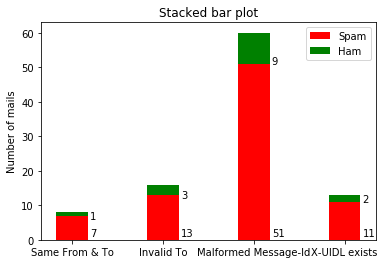

In [33]:
p1 = plt.bar(x_data,y_data[0],color='r',align='center',label=['f1','f2','f3','f4'], width=0.35)
p2 = plt.bar(x_data,y_data[1],color='g',bottom=y_data[0],align='center',label=['f1','f2','f3','f4'], width=0.35)
plt.ylabel('Number of mails')
plt.title('Stacked bar plot')
plt.xticks(x_data, ('Same From & To','Invalid To','Malformed Message-Id','X-UIDL exists'))
plt.yticks(np.arange(0,61,10))
plt.legend((p1[0],p2[0]),('Spam','Ham'),loc = 'upper right')
plt.text(1.20,1,spam_feature1)
plt.text(1.20,6,ham_feature1)
plt.text(2.20,1,spam_feature2)
plt.text(2.20,12,ham_feature2)
plt.text(3.20,1,spam_feature3)
plt.text(3.20,51,ham_feature3)
plt.text(4.20,1,spam_feature4)
plt.text(4.20,11,ham_feature4)
plt.show()